# خوارزمية شجرة القرار

تصنيف المبيعات باستخدام خوارزمية شجرة القرار

## استيراد المكتبات المطلوبة

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# تعيين نمط seaborn
sns.set_style('whitegrid')
# تعيين حجم الرسومات
plt.rcParams['figure.figsize'] = (12, 8)

## تحميل البيانات المعالجة

In [3]:
# تحميل البيانات المعالجة
df = pd.read_csv('../data/processed/sales_data_processed_20250122_052318.csv')
df.head()

,Order_Date,Category,Region,Segment,Sales,Quantity,Discount,Profit,Year,Month,Quarter,Sales_Category
0,2020-01-01,Technology,South,Consumer,366.800399,6,0.284533,9.524490,2020,1,1,Low
1,2020-01-02,Furniture,South,Home Office,556.867561,6,0.191294,37.407146,2020,1,1,Medium
2,2020-01-03,Technology,West,Home Office,212.152047,1,0.162915,125.708433,2020,1,1,Low
3,2020-01-04,Technology,East,Consumer,687.228360,5,0.118807,137.810135,2020,1,1,High
4,2020-01-05,Furniture,East,Home Office,147.447790,6,0.267729,-30.090084,2020,1,1,Low


## تحضير البيانات للتدريب

In [4]:
# تشفير المتغيرات الفئوية
le = LabelEncoder()
categorical_cols = ['Category', 'Region', 'Segment']
for col in categorical_cols:
    df[f'{col}_Encoded'] = le.fit_transform(df[col])

In [5]:
# تحديد المتغيرات المستقلة والتابع
features = ['Year', 'Month', 'Quarter', 'Quantity', 'Discount',
            'Category_Encoded', 'Region_Encoded', 'Segment_Encoded']

X = df[features]
y = df['Sales_Category']

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## تدريب النموذج

In [6]:
# إنشاء وتدريب النموذج
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

# حساب الدقة
train_accuracy = dt.score(X_train, y_train)
test_accuracy = dt.score(X_test, y_test)

print(f'دقة التدريب: {train_accuracy:.2f}')
print(f'دقة الاختبار: {test_accuracy:.2f}')

دقة التدريب: 0.41
دقة الاختبار: 0.32


## تقييم النموذج

In [7]:
# التنبؤ على بيانات الاختبار
y_pred = dt.predict(X_test)

# عرض تقرير التصنيف
print('تقرير التصنيف:')
print(classification_report(y_test, y_pred))

تقرير التصنيف:
              precision    recall  f1-score   support

        High       0.32      0.51      0.40       190
         Low       0.31      0.27      0.29       215
      Medium       0.31      0.19      0.24       195

    accuracy                           0.32       600
   macro avg       0.32      0.32      0.31       600
weighted avg       0.32      0.32      0.31       600



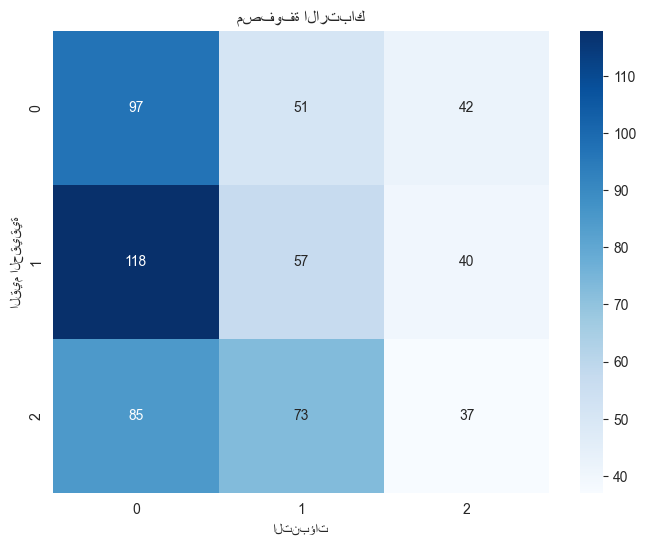

In [8]:
# رسم مصفوفة الارتباك
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('مصفوفة الارتباك')
plt.xlabel('التنبؤات')
plt.ylabel('القيم الحقيقية')
plt.show()

## تصور شجرة القرار

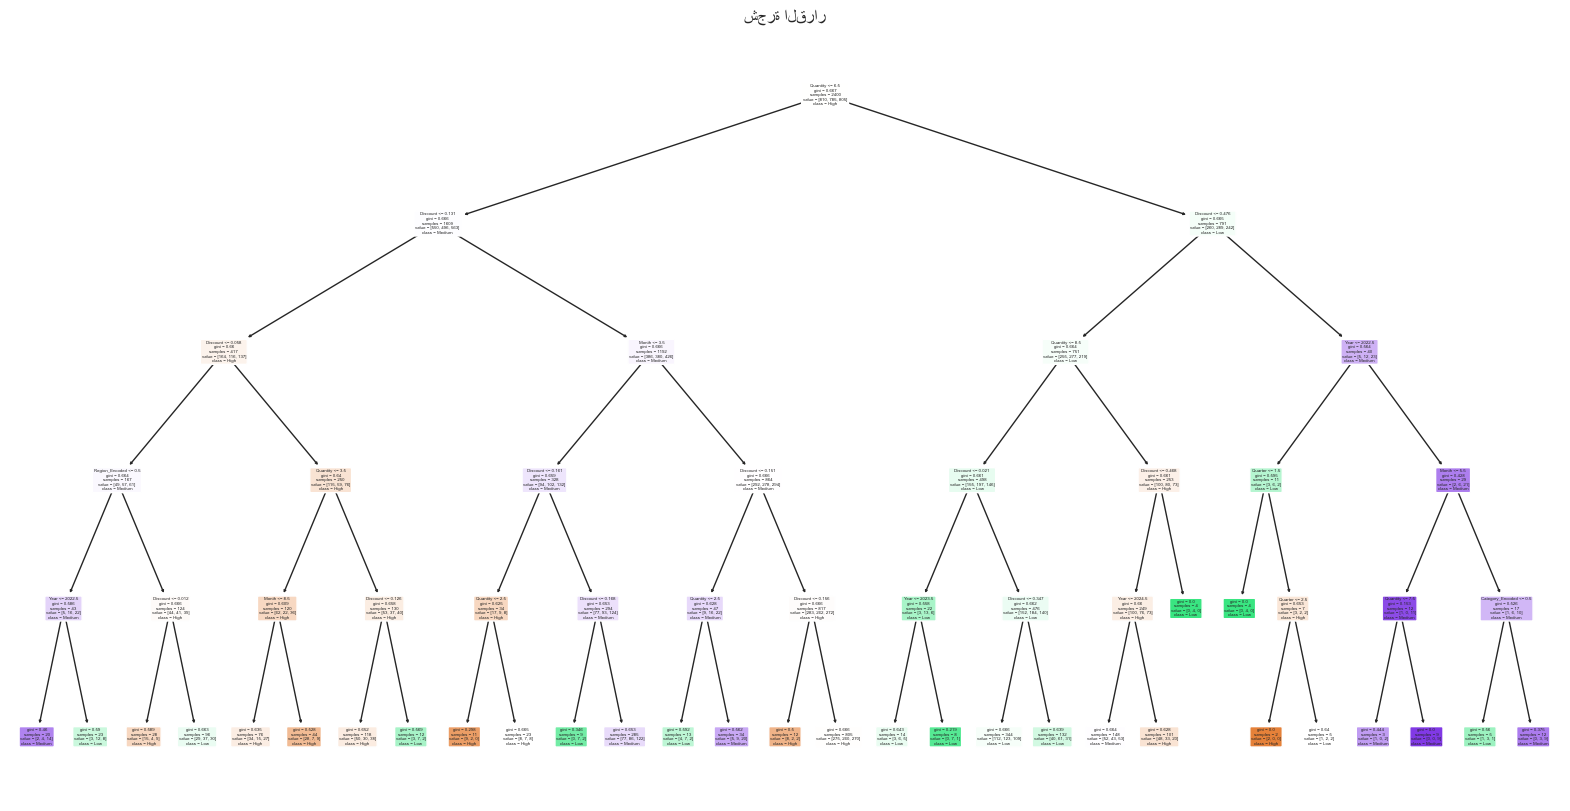

In [11]:
# رسم شجرة القرار
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features, class_names=list(dt.classes_), filled=True, rounded=True)
plt.title('شجرة القرار')
plt.show()

## أهمية المتغيرات

d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\python\data_mining_project\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


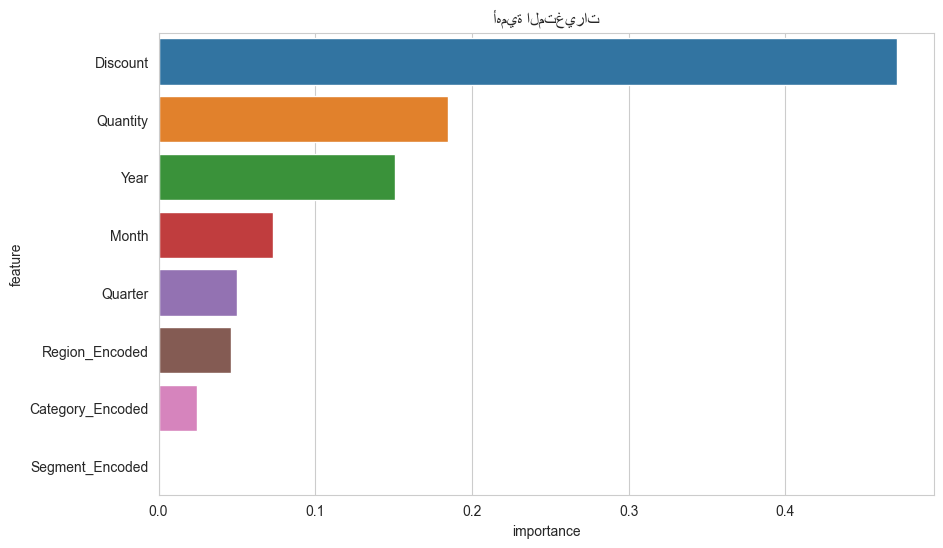

In [12]:
# عرض أهمية المتغيرات
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('أهمية المتغيرات')
plt.show()